# Data Mining (CSE 5334) Term Project
## by Rongon Chatterjee
## Student ID = 1001692199

### GitHub Link - https://github.com/rchat95/RC_DMTermProject

### Web Demo - http://rongonrc.pythonanywhere.com/

### YouTube Video - https://www.youtube.com/watch?v=wyIhpXaWotk

In [65]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [66]:
%matplotlib inline

## Clustering Approach

In [67]:
nRowsRead = None # specify 'None' if want to read whole file
df2 = pd.read_csv('2020-08-19.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = '2020-08-19.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 19330 rows and 10 columns


### Dataset Description

### Here, we are analysing the file '2020-08-19.csv' available at https://www.kaggle.com/jvanelteren/boardgamegeek-reviews
### Every row represents a game and information related to it, such as, average rating, number of users rated, year etc.

In [68]:
df2.head()

,Unnamed: 0,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,90,30549,Pandemic,2008,91,7.62,7.518,96186,/boardgame/30549/pandemic,https://cf.geekdo-images.com/micro/img/0m3-oqB...
1,172,822,Carcassonne,2000,173,7.42,7.311,96181,/boardgame/822/carcassonne,https://cf.geekdo-images.com/micro/img/z0tTaij...
2,380,13,Catan,1995,381,7.16,7.001,96171,/boardgame/13/catan,https://cf.geekdo-images.com/micro/img/e0y6Bog...
3,49,68448,7 Wonders,2010,50,7.76,7.662,79830,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/micro/img/h-Ejv31...
4,87,36218,Dominion,2008,88,7.63,7.521,74933,/boardgame/36218/dominion,https://cf.geekdo-images.com/micro/img/VYp2s2f...


### Data Cleaning

In [69]:
print("Rows before cleaning the data = " + str(len(df2)))

Rows before cleaning the data = 19330


In [70]:
#Dropping the rows having missing values and retaining only those games that have been rated by atleast 1 user
df2 = df2.dropna(axis=0)
df2 = df2[df2["Users rated"] > 0]
df2 = df2.drop(df2.columns[0], axis=1) #Dropping the first column as it is unneccessary
print("Rows after cleaning the data = " + str(len(df2)))

Rows after cleaning the data = 19317


In [71]:
df2.head()

,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,30549,Pandemic,2008,91,7.62,7.518,96186,/boardgame/30549/pandemic,https://cf.geekdo-images.com/micro/img/0m3-oqB...
1,822,Carcassonne,2000,173,7.42,7.311,96181,/boardgame/822/carcassonne,https://cf.geekdo-images.com/micro/img/z0tTaij...
2,13,Catan,1995,381,7.16,7.001,96171,/boardgame/13/catan,https://cf.geekdo-images.com/micro/img/e0y6Bog...
3,68448,7 Wonders,2010,50,7.76,7.662,79830,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/micro/img/h-Ejv31...
4,36218,Dominion,2008,88,7.63,7.521,74933,/boardgame/36218/dominion,https://cf.geekdo-images.com/micro/img/VYp2s2f...


### Data Analysis
#### Understanding the distribution of the average ratings of the games

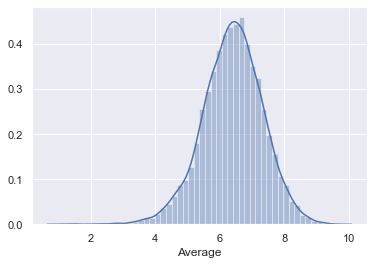

In [72]:
sns.set(color_codes="True")
sns.distplot(df2["Average"])

In [73]:
sd = df2["Average"].std()
mean = df2["Average"].mean()

print('Rating Standard Deviation = ' + str(sd) + '\n' + 'Rating Mean = ' + str(mean))

Rating Standard Deviation = 0.9304782337871004
Rating Mean = 6.39241341823261


#### On observing the histogram and on calculating the mean, we can see that the games have a rating of around 6.4 on average

#### Clustering the data using K-Means algorithm to find patterns

#### Dropping non-numeric columns so that we can calculate the mean and standard deviation of each row

In [87]:
df_numeric = df2.drop(['Name','ID','URL', 'Thumbnail'],axis=1)
df_numeric.head()

,Year,Rank,Average,Bayes average,Users rated
0,2008,91,7.62,7.518,96186
1,2000,173,7.42,7.311,96181
2,1995,381,7.16,7.001,96171
3,2010,50,7.76,7.662,79830
4,2008,88,7.63,7.521,74933


Wall time: 1.88 s


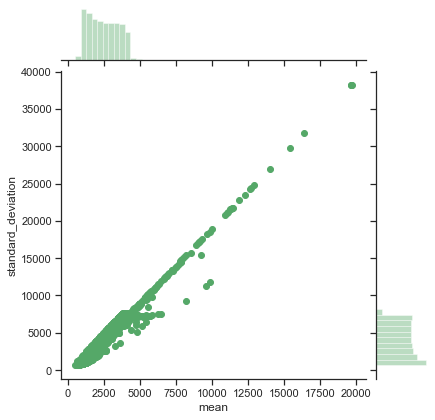

In [91]:
%%time
kmodel = KMeans(n_clusters=5, random_state=1) #Number of clusters is a hyperparamter that can be tuned for optimal performance

kmodel.fit(df_numeric)

games_mean = df_numeric.apply(np.mean, axis=1)
games_sd = df_numeric.apply(np.std, axis=1)

labels = kmodel.labels_
df_plot = pd.DataFrame()
df_plot["mean"] = games_mean
df_plot["standard_deviation"] = games_sd
sns.set_style(style="ticks")
sns.jointplot(x="mean", y="standard_deviation", data=df_plot, color="g")

#### Observation - Most of the games have similar numeric attributes in the lower mean range. As the mean increases, mostly due to an increase in the number of user ratings, the number of games decreases. So, we see that very few games get reviewed or rated by a lot of users, maybe because most games don't get played much.
#### Also, I could not see any significant change in the cluster distribution on changing the number of clusters hyperparameter.

### Analyzing the correlation of attributes to average rating of the games
#### This will allow us to drop columns that are negatively correlated to the average rating

In [92]:
corr_df = df_numeric.corr()
print(type(corr_df))

corr_df["Average"] #Shows us how each column in our dataset is correlated with the average rating column

<class 'pandas.core.frame.DataFrame'>


Year             0.081731
Rank            -0.740501
Average          1.000000
Bayes average    0.485245
Users rated      0.172890
Name: Average, dtype: float64

#### We see that the attributes have a very low correlation with the average rating, so an approach like regression will not work out

## Classifier Approach

### Reading the data

In [93]:
nRowsRead = None # specify 'None' if want to read whole file
df = pd.read_csv('bgg-15m-reviews.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'bgg-15m-reviews.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 15823269 rows and 6 columns


In [ ]:
df.head()

In [4]:
#Shuffle the Dataset
df = df.sample(frac=1)
len(df)

15823269

In [30]:
%time
#Drop the rows where the "comment" column is empty
df.dropna(subset=['comment'], inplace=True)
len(df)

Wall time: 18.5 ms


2995023

Analyzing the distribution of the ratings in our dataset


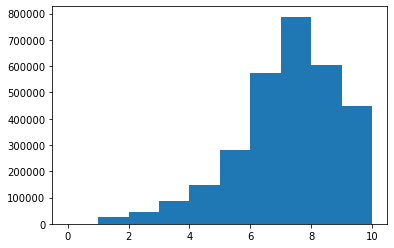

Wall time: 327 ms


In [32]:
%%time
plt.hist(df['rating'])
plt.show()

The rating of value 7 has the highest frequency of almost 800k. The cummulative frequency of ratings 1, 2, and 3 is less than 100K.

Cleaning the dataset:
    - removing emojis
    - removing hyperlinks
    - removing special characters

In [35]:
import emoji
import re
def clean_data(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  
    u"\U0001F300-\U0001F5FF"  
    u"\U0001F680-\U0001F6FF"  
    u"\U0001F1E0-\U0001F1FF"  
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE)
    text = re.sub(r'\n',' ', text) 
    text = re.sub('\s+', ' ', text).strip() 
    return emoji_pattern.sub(r'', text)
    return url.sub(r'',text)

In [37]:
%%time
df['comment'] = df['comment'].apply(clean_data)

Wall time: 1min 2s


Tf-idf Vectorization and removing stopwords.

In [38]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
count_vectorizer = feature_extraction.text.TfidfVectorizer(stop_words='english')

Top 15 words before removing stopwords

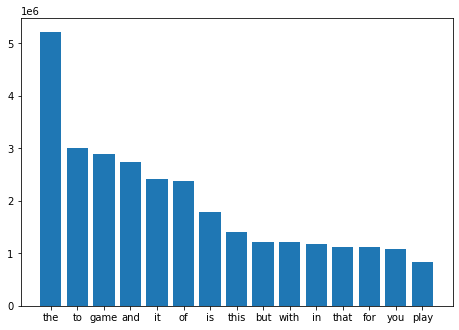

Wall time: 4min 23s


In [39]:
%%time
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['comment'], 15)

langs=[]
students=[]
for word, freq in common_words:
    langs.append(word)
    students.append(freq)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(langs,students)
plt.show()

Top 15 words after removing stopwords

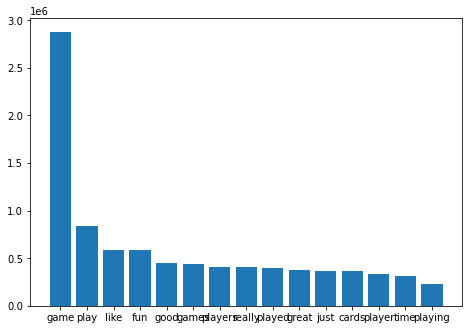

Wall time: 2min 28s


In [40]:
%%time
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['comment'], 15)
langs=[]
students=[]
for word, freq in common_words:
    langs.append(word)
    students.append(freq)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(langs,students)
plt.show()

In [41]:
#Store the reviews in X and the ratings i.e. the class labels in y
X = df['comment'].values
y = df['rating'].values

In [42]:
len(df['rating'].unique())

4384

The rating column contains 4384 unique values

In [44]:
#Rounding off the decimal ratings
y = np.round(y)
len(df['rating'].unique())

4384

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
%%time
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

Wall time: 864 ms


Create vectors for the train data

In [50]:
%%time
train_vectors = count_vectorizer.fit_transform(X_train)

Wall time: 1min 7s


Create vectors for the test data

In [51]:
%%time
test_vectors = count_vectorizer.transform(X_test)

Wall time: 16.4 s


In [52]:
#Load the required libraries
import sklearn
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [53]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve

In [54]:
def range_accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i] or actual[i] == (predicted[i]+1) or actual[i] == (predicted[i]-1) :
            correct += 1
    return correct / float(len(actual)) * 100.0

## Ridge Classifier

Fit the Ridge classifier model on the train data

In [55]:
%%time
clf = RidgeClassifier()
clf.fit(train_vectors, y_train)

Wall time: 11min 56s


RidgeClassifier()

Predicting the values of the test set

In [56]:
%%time
y_pred = np.round(clf.predict(test_vectors))

Wall time: 2.86 s


Accuracy on Ridge Classifier

In [57]:
%%time
acc = accuracy_score(np.round(y_pred), np.round(y_test))
print('Accuracy on Ridge Classifier : {} %'.format(acc))

Accuracy on Ridge Classifier : 0.3201626029832806 %
Wall time: 385 ms


In [58]:
%%time
range_ridge_score=range_accuracy_metric(y_test, np.round(y_pred))
print('Range Accuracy on Ridge Classifier : {} %'.format(range_ridge_score))

Range Accuracy on Ridge Classifier : 69.54382684618659 %
Wall time: 550 ms


Mean Square error on Ridge Classifier

In [59]:
mse1 = mean_squared_error(y_test, y_pred, squared=False)
mse1

1.650884506638784

In [60]:
%%time
print(metrics.classification_report(np.round(y_test), np.round(y_pred)))

C:\Users\rongo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.37      0.10      0.16      4692
         2.0       0.23      0.04      0.07      8868
         3.0       0.20      0.02      0.04     15781
         4.0       0.23      0.06      0.09     30548
         5.0       0.23      0.05      0.08     48532
         6.0       0.31      0.41      0.35    117431
         7.0       0.30      0.26      0.28    130102
         8.0       0.34      0.64      0.45    150480
         9.0       0.24      0.04      0.07     55600
        10.0       0.36      0.18      0.24     36969

    accuracy                           0.32    599005
   macro avg       0.25      0.16      0.17    599005
weighted avg       0.30      0.32      0.28    599005

Wall time: 2.41 s


## Multinomial Naive Bayes Classifier

Fit the Multinomial Naive Bayes classifier model on the train data

In [61]:
%%time
clf2 = MultinomialNB()
clf2.fit(train_vectors, y_train)

Wall time: 7.4 s


MultinomialNB()

Predicting the values of the test set

In [62]:
%%time
y_pred_nb = np.round(clf2.predict(test_vectors))

Wall time: 287 ms


Accuracy on Multinomial Naive Bayes Classifier

In [63]:
acc2 = accuracy_score(y_pred_nb, np.round(y_test))
print('Range Accuracy on Multinomial Naive Bayes : {} %'.format(acc2))

Range Accuracy on Multinomial Naive Bayes : 0.305860552082203 %


In [64]:
range_MNB_score=range_accuracy_metric(y_test, np.round(y_pred_nb))
print('Range Accuracy on Multinomial Naive Bayes : {} %'.format(range_MNB_score))

Range Accuracy on Multinomial Naive Bayes : 66.43433694209564 %


Mean Square error on Multinomial Naive Bayes Classifier

In [66]:
mse2 = mean_squared_error(y_test, np.round(y_pred_nb), squared=False)
mse2

1.7316377490916939

In [67]:
print(metrics.classification_report(np.round(y_test), np.round(y_pred_nb)))

C:\Users\rongo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.50      0.00      0.00      4692
         2.0       0.04      0.00      0.00      8868
         3.0       0.17      0.00      0.00     15781
         4.0       0.43      0.00      0.01     30548
         5.0       0.19      0.00      0.00     48532
         6.0       0.29      0.32      0.31    117431
         7.0       0.30      0.15      0.20    130102
         8.0       0.31      0.83      0.45    150480
         9.0       0.21      0.00      0.01     55600
        10.0       0.42      0.01      0.02     36969

    accuracy                           0.31    599005
   macro avg       0.26      0.12      0.09    599005
weighted avg       0.29      0.31      0.22    599005



## Linear SVC

Fit the Linear SVC model on the train data

In [68]:
%%time
clf3 = LinearSVC()
clf3.fit(train_vectors, y_train)

Wall time: 7min 17s


LinearSVC()

Predicting the values of the test set

In [69]:
%%time
y_pred_svc = np.round(clf3.predict(test_vectors))

Wall time: 291 ms


Accuracy on Linear SVC

In [70]:
acc3 = accuracy_score(y_pred_svc, np.round(y_test))
print('Range Accuracy on Linear SVC : {} %'.format(acc3))

Range Accuracy on Linear SVC : 0.3203712823766079 %


In [71]:
range_svc_score=range_accuracy_metric(y_test, np.round(y_pred_svc))
print('Range Accuracy on Linear SVC : {} %'.format(range_svc_score))

Range Accuracy on Linear SVC : 69.55434428761029 %


Mean Square error on Linear SVC

In [72]:
mse3 = mean_squared_error(y_test, np.round(y_pred_svc), squared=False)
mse3

1.6516533731742828

In [73]:
print(metrics.classification_report(np.round(y_test), np.round(y_pred_svc)))

C:\Users\rongo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.33      0.19      0.24      4692
         2.0       0.23      0.07      0.11      8868
         3.0       0.19      0.04      0.06     15781
         4.0       0.22      0.07      0.10     30548
         5.0       0.22      0.06      0.09     48532
         6.0       0.31      0.40      0.35    117431
         7.0       0.30      0.26      0.28    130102
         8.0       0.35      0.62      0.45    150480
         9.0       0.23      0.05      0.08     55600
        10.0       0.36      0.22      0.27     36969

    accuracy                           0.32    599005
   macro avg       0.25      0.18      0.18    599005
weighted avg       0.30      0.32      0.28    599005



## Voting Classifier

Fit the ensemble model on the train data

In [74]:
%%time
from sklearn.ensemble import VotingClassifier
estimators = []
estimators.append(('ridge', clf))
estimators.append(('MNB', clf2))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(train_vectors, y_train)

Wall time: 11min 13s


VotingClassifier(estimators=[('ridge', RidgeClassifier()),
                             ('MNB', MultinomialNB())])

Predicting the values of the test set

In [75]:
y_pred_ensemble = np.round(ensemble.predict(test_vectors))

Accuracy on Ensemble model

In [76]:
acc4 = accuracy_score(y_pred_ensemble, np.round(y_test))
print('Range Accuracy on Ensemble model : {} %'.format(acc4))

Range Accuracy on Ensemble model : 0.31688884066076245 %


In [77]:
range_ensemble_score=range_accuracy_metric(y_test, np.round(y_pred_ensemble))
print('Range Accuracy on Ensemble model : {} %'.format(range_ensemble_score))

Range Accuracy on Ensemble model : 69.37037253445297 %


Mean Square error on Ensemble

In [78]:
mse4 = mean_squared_error(y_test, y_pred_ensemble, squared=False)
mse4

1.6146336047067877

In [79]:
print(metrics.classification_report(np.round(y_test), np.round(y_pred_ensemble)))

C:\Users\rongo\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.37      0.10      0.16      4692
         2.0       0.23      0.04      0.07      8868
         3.0       0.20      0.02      0.04     15781
         4.0       0.23      0.06      0.09     30548
         5.0       0.23      0.05      0.08     48532
         6.0       0.30      0.43      0.36    117431
         7.0       0.30      0.26      0.28    130102
         8.0       0.34      0.67      0.45    150480
         9.0       0.26      0.00      0.01     55600
        10.0       0.57      0.01      0.01     36969

    accuracy                           0.32    599005
   macro avg       0.27      0.15      0.14    599005
weighted avg       0.31      0.32      0.26    599005



## Accuracy vs Range Accuracy

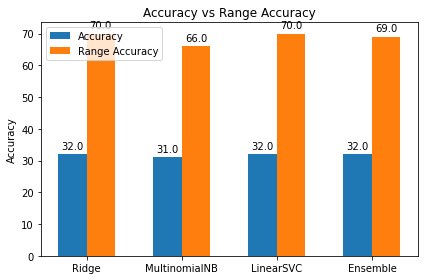

In [80]:
labels = ['Ridge', 'MultinomialNB', 'LinearSVC', 'Ensemble']
accuracy = np.round([acc*100, acc2*100, acc3*100, acc4*100])
range_accuracy = np.round([range_ridge_score, range_MNB_score, range_svc_score, range_ensemble_score])

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, range_accuracy, width, label='Range Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Range Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [82]:
import joblib
joblib.dump(clf, 'ridge_model.sav')
joblib.dump(count_vectorizer, 'vector.sav')
joblib.dump(clf2, 'multi_naive_bayes.sav')
joblib.dump(clf3, 'linear_SVC.sav')

['linear_SVC.sav']

### I will choose the Ridge Classifier model as the best out of these ones as linear classifiers such as ridge or linear SVC work quite well on text classification problems. This is because text classification problems contain many features and high dimensional problems are likely to be linearly separable

###  Ridge classifier avoids overfitting by regularizing the weights to keep them small, and model selection is straight forward as we only have to choose the value of a single regression parameter